In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
import pprint
%matplotlib inline

np.random.seed(433)

![](images/python-and-mongo.png)
<br>
# MongoDB e Python para Análise de Dados
<br>
NoSQL Bahia
<br>
2018-03-09

### Sobre mim
<br>
```javascript
{
    name: "Pedro Correia",
    occupation: "Cientista de Dados",
    interests: ["Open Data", "Open Source Software"]
    tech: [
        {
            name: "MongoDB",
            category: "Base de Dados",
            group: "Advocacy Hub"
        },
        {
            name: "Python",
            category: "Linguagem de Programação",
            version: "3.x",
            comments: [
                "♥",
                "Melhor que R #brinks"
            ]
        }
    ]
}
```


# Data Science

<br>
<img src="images/venn.jpg" alt="Drawing" align="middle" style="width: 600px;"/>



> BUSCA DE **PADRÕES** E **INFORMAÇÕES ACIONÁVEIS** 
> EM DADOS - HISTÓRICOS OU EM TEMPO REAL

| | |
| --- | --- |
| **Armazenagem de Dados** | <img src="images/datastorage.png" alt="Drawing" align="middle" style="width: 220px;"/> | **Limpeza / Tratamento** | <img src="images/datacleaning.png" alt="Drawing" align="middle" style="width: 200px;"/> |
| **Modelagem / Machine Learning** |  <img src="images/roc.png" alt="Drawing" align="middle" style="width: 750px;"/> | **Análise Exploratória** | <img src="images/explora.png" alt="Drawing" align="middle" style="width: 1000px;"/> |

<img src="images/mongo_logo.png" align="middle" style="width: 750px;" />

<img src="images/mongo_logo.png" align="middle" style="width: 250px;" />

- Base de Dados Orientada a Documentos
- Alta disponibilidade 
- Alta escalabilidade | Arquitetura Distribuída Nativa
- Baixa Latência

<img src="images/mongo_logo.png" align="middle" style="width: 250px;" />

- Modelo de Dados Flexíveis
- Dados Semi-estruturados
- Dados Esparsos
- Modelo de Query Rico e Expressivo

- Diversos Drivers: C, C++, C#, Java, Scala, Spark, PYTHON
<img src="images/logo-stack-python.png" align="middle" style="width: 520px;" />

<img src="images/mongo_logo.png" align="middle" style="width: 250px;" />

## Casos de Uso:

- High Volume Data Feeds
<img src="images/electrical_sensor.png" align="middle" style="width: 75px;" />
- Inteligência Operacional
<img src="images/catalogue.jpg" align="middle" style="width: 75px;"/>
- Real Time Analytics
<img src="images/realtime.png" align="middle" style="width: 75px;"/>

# Ciência de Dados com MongoDB - Por quê?

### - Mongo DB cada vez mais popular em aplicações de diversas naturezas
<img src="images/popularity.png" align="middle" style="width: 700px;"/> 

### - Interagir com dados pode ser extremamente eficiente
 - Liguagem de Query
 - Secondary Indexes
 - Dados podem ser modelados de forma a serem consumidos diretamente

 - **AGGREGATION FRAMEWORK !!!**
<img src="images/aggregation.png" align="middle" style="width: 500px;"/> 

```
- With aggregation framework ther is no need to move your data so it can be analyzed - it is usually faster to process it where it already is (MongoDB server)
- origem: | de sistemas Unix
- pipeline : stages                                                  \
- normais: \$match, \$project, \$group, \$sort, \$limit, \$unwind  ---\  EXEM
- avançados: \$map, \$filter, \$reduce                             ---/  PLOS
- avoid unnecessary blocking stages                                  /
- use indexes
```

# Aggregation Framework

<img src="images/ferramentas.jpeg" align="middle" style="width: 300px;"/> 

# Aggregation Framework

- Método extremamente flexível de remodelar dados
- Rica biblioteca de funções
- Excelente para explorações _ad-hoc_
- Alternativa mais simples e fácil de programar ao MapReduce
- Permite processar dados sem penalidade de transmissão

- Estrutura básica: _pipeline_ de _stages_
<br>
<img src="images/pipeline.png" align="middle" style="width: 500px;"/> 

<img src="images/stage.png" align="middle" style="width: 500px;"/> 

## Examinando principais stages

Nossos dados de exemplo:

<img src="images/soa.jpg" align="middle" style="width: 500px;"/> 

In [2]:
db = pymongo.MongoClient()['nosqlba']
for d in db.soja.find().limit(2):
    pprint.pprint(d)
    print()
print('Total de observações: {}'.format(db.soja.count()))

{'_id': ObjectId('5aa258d1569ab1332fd626e4'),
 'cor': 'Marrom',
 'dimensoes': {'x': 8.505010251304943, 'y': 8.893234206420033},
 'origem': {'estado': 'Mato Grosso', 'fazenda': 'Soja Grossa Plantation'},
 'peso': 2.2939604630447277,
 'safra': '2015/2016',
 'toxicos': ['veneno_2', 'remedio_a', 'veneno_4']}

{'_id': ObjectId('5aa258d1569ab1332fd626e5'),
 'cor': 'Marrom',
 'dimensoes': {'x': 16.204843749319267, 'y': 6.264987787685765},
 'origem': {'estado': 'Goiás', 'fazenda': 'Fazenda Del Busso'},
 'peso': 5.593287217861297,
 'safra': '2015/2016',
 'toxicos': ['remedio_a', 'remedio_y']}

Total de observações: 600000


## $match

> **Filtra** os documentos

- Reduz a quantidade de documentos processados
- Se utiliza de índices

<img src="images/match.jpg" align="middle" style="width: 180px;"/> 

In [13]:
matching = {'$match': {'origem.estado': 'Goiás', 
                       'peso': {'$gte': 1.3, '$lt': 10}}}
pipeline = [matching]
db.soja.aggregate(pipeline).next()

{'_id': ObjectId('5aa258d1569ab1332fd626e5'),
 'cor': 'Marrom',
 'dimensoes': {'x': 16.204843749319267, 'y': 6.264987787685765},
 'origem': {'estado': 'Goiás', 'fazenda': 'Fazenda Del Busso'},
 'peso': 5.593287217861297,
 'safra': '2015/2016',
 'toxicos': ['remedio_a', 'remedio_y']}

# $project

> **Manipula** os dados

- Seleciona, cria ou renomeia campos
- Injeta campos calculados
- Pode criar sub-documentos

<img src="images/project.png" align="middle" style="width: 250px;"/> 

In [25]:
projecting = {
    '$project': {
        '_id': 0,
        'fazenda': '$origem.fazenda', 
        'peso': 1, 'safra': 1,
        'dim_x': '$dimensoes.x', 'dim_y': '$dimensoes.y',
        'grau_de_esfericidade': {'$abs': {'$subtract': [1, {'$divide': ['$dimensoes.x', '$dimensoes.y']}]}} 
    }
}
pipeline = [{'$sample': {'size': 10000}}, matching, projecting]
df = pd.DataFrame(list(db.soja.aggregate(pipeline)))
df.sample(2)

,dim_x,dim_y,fazenda,grau_de_esfericidade,peso,safra
1926,5.332864,4.809262,Fazenda Só Soja Já!,0.108874,1.440984,2016/2017
470,12.455902,20.780011,Fazenda Del Busso,0.400583,6.865676,2015/2016


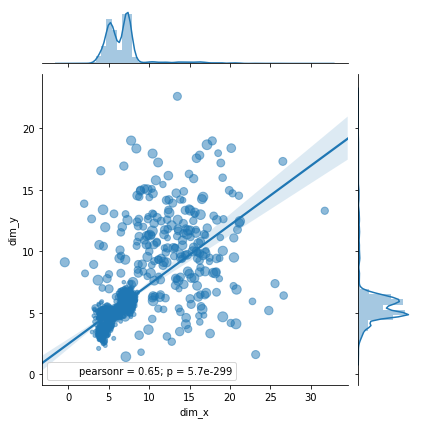

In [17]:
sns.jointplot(x='dim_x', y='dim_y', data=df, kind='reg', joint_kws={'scatter_kws': {'alpha': 0.5, 's': df.peso*10}});

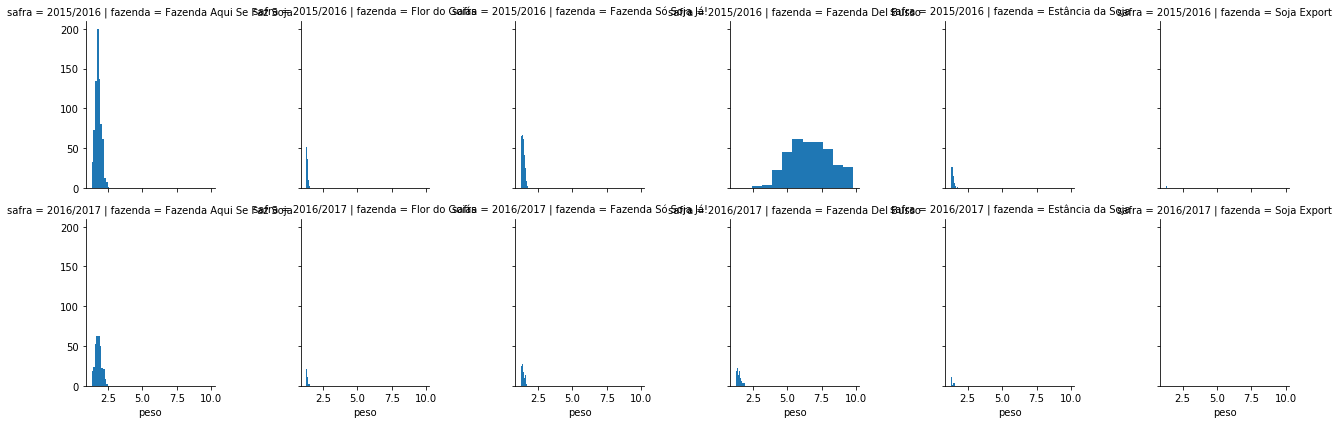

In [6]:
g = sns.FacetGrid(df, row='safra', col="fazenda")
g = g.map(plt.hist, "peso")

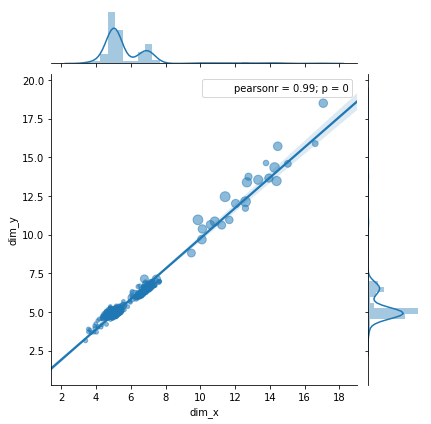

In [7]:
matching_esfera = {
    '$match': {
        'grau_de_esfericidade': {'$lte': 0.1}
    }
}
pipeline = [{'$sample': {'size': 10000}}, matching, projecting, matching_esfera]

df = pd.DataFrame(list(db.soja.aggregate(pipeline)))
sns.jointplot(x='dim_x', y='dim_y', data=df, kind='reg', joint_kws={'scatter_kws': {'alpha': 0.5, 's': df.peso*10}});

# $group

> Agrupa os documentos por algum campo

- Agregações como somas, médias, counts, máximos e mínimos (```$avg $sum $max $min```)
- Criação de arrays ou sets (```$push``` ou ```$addToSet```)

<img src="images/group.jpeg" align="middle" style="width: 170px;"/> 

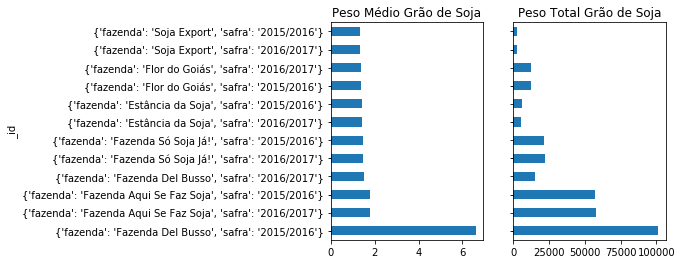

In [24]:
grouping = {
    '$group': {
        '_id': {'fazenda': '$fazenda', 'safra': '$safra'},
        'peso_medio': {'$avg': '$peso'},
        'peso_total': {'$sum': '$peso'}
    }
}
sorting = {'$sort': {'peso_medio': -1}}

pipeline = [matching, projecting, grouping, sorting]
df = pd.DataFrame(list(db.soja.aggregate(pipeline))).set_index("_id")
fig, ax = plt.subplots(1, 2, sharey=True)
df[['peso_medio']].plot(kind='barh', legend=False, title='Peso Médio Grão de Soja', ax=ax[0]);
df[['peso_total']].plot(kind='barh', legend=False, title='Peso Total Grão de Soja', ax=ax[1]);

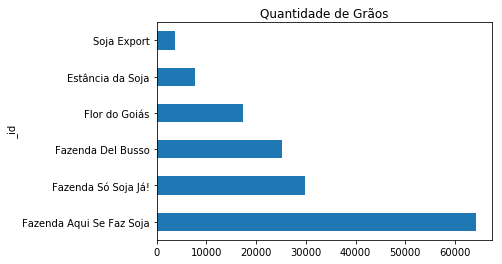

In [9]:
grouping = {
    '$group': {
        '_id': '$fazenda',
        'sementes': {'$sum': 1}
    }
}
sorting = {'$sort': {'sementes': -1}}

pipeline = [matching, projecting, grouping, sorting]
df = pd.DataFrame(list(db.soja.aggregate(pipeline)))
df.set_index("_id", inplace=True)
df.plot(kind='barh', legend=False, title='Quantidade de Grãos');

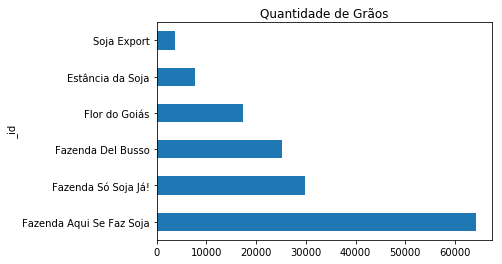

In [12]:
grouping = {
    '$sortByCount': '$fazenda'
}

pipeline = [matching, projecting, grouping]
df = pd.DataFrame(list(db.soja.aggregate(pipeline)))
df.set_index("_id", inplace=True)
df.plot(kind='barh', legend=False, title='Quantidade de Grãos');

# $unwind

> Cria novos documentos a partir de campos de array

- Utilizado para "destrinchar" campos listados
- Em geral utilizado antes de um estágio ```$group```

<img src="images/unwind.png" align="middle" style="width: 200px;"/> 

In [26]:
unwinding = {'$unwind': '$toxicos'}
db.soja.aggregate([unwinding]).next()

{'_id': ObjectId('5aa258d1569ab1332fd626e4'),
 'cor': 'Marrom',
 'dimensoes': {'x': 8.505010251304943, 'y': 8.893234206420033},
 'origem': {'estado': 'Mato Grosso', 'fazenda': 'Soja Grossa Plantation'},
 'peso': 2.2939604630447277,
 'safra': '2015/2016',
 'toxicos': 'veneno_2'}

In [34]:
grouping = {'$group': {'_id': '$toxicos', 'avg_dim': {'$avg': '$dimensoes.x'}, 'stddev_dim': {'$stdDevSamp': '$dimensoes.x'}}}
pipeline = [matching, unwinding, grouping]
pd.DataFrame(list(db.soja.aggregate(pipeline)))

,_id,avg_dim,stddev_dim
0,veneno_2,6.375815,1.845980
1,veneno_4,6.457065,1.837035
2,remedio_a,7.322900,1.941994
3,veneno_3,6.340343,1.807236
4,remedio_b,7.012880,1.989685
5,veneno_1,5.157855,0.530282
6,remedio_y,7.498075,1.915891
7,remedio_x,6.989467,1.983633


# Outros Stages:

- ```$sort, $skip $limit```: paginação
- ```$geoNear```: query por proximidade por uso de coordenadas geográficas
- ```$let $map $reduce```: criação de manipulações customizadas
- ```$facet```: agregações em paralelo
- ```$lookup```: JOIN !?


# Retornando à Ciência de Dados - Machine Learning
<br>
<img src="images/ml.png" align="middle" style="width: 600px;"/> 


<img src="images/mongohero.png" align="middle" style="width: 180px;"/> 

- Dados advindos do MongoDB podem ser utilizados na criação de modelos estatísticos sofisticados
- MongoDB **não** é uma engine de ML - mas pode facilitar muito o processo
- Com o uso do **Aggregation Framework**, pode-se manipular e preparar os dados para algoritmos especializados
- Via o driver _pymongo_ pode-se facilmente integrar a base de dados com poderosas bibliotecas do stack científico do Python

<img src="images/agg_scikit.png" align="middle"/> 


# EXEMPLOS

- Cálculo de **Correlação Pearson** dentro do MongoDB
- **Regressão Linear** com scikit-learn
- **Regra de Associação** com MLXtend
- **Árvore de Decisão** com scikit-Learn
- Infinitas possibilidades de interação

# OBRIGADO!

<br>
Pedro Correia
<br><br>
pedrocorreia.rs@gmail.com <br>
11 986730396
